In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import torch

In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/gscdit/Breast-Cancer-Detection/refs/heads/master/data.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.shape

(569, 33)

In [5]:
df.drop(columns=['id', 'Unnamed: 32'], inplace= True)

### train test split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:], df.iloc[:, 0], test_size=0.2)

### Scaling

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Label encoding

In [8]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

### Numpy to pytorch tensors

In [9]:
X_train_tensor = torch.from_numpy(X_train.astype(np.float32))
X_test_tensor = torch.from_numpy(X_test.astype(np.float32))
y_train_tensor = torch.from_numpy(y_train.astype(np.float32))
y_test_tensor = torch.from_numpy(y_test.astype(np.float32))

In [10]:
X_train_tensor.shape

torch.Size([455, 30])

In [11]:
y_train_tensor.shape

torch.Size([455])

### Defining the model


In [12]:
import torch.nn as nn


class MySimpleNN(nn.Module):

  def __init__(self, num_features):

    super().__init__()
    self.linear = nn.Linear(num_features, 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, features):

    out = self.linear(features)
    out = self.sigmoid(out)

    return out

In [16]:
learning_rate = 0.1
epochs = 50

In [17]:
# define loss function
loss_function = nn.BCELoss()

### Training pipeline

In [18]:
# create model
model = MySimpleNN(X_train_tensor.shape[1])

# define optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# define loop
for epoch in range(epochs):

  # forward pass
  y_pred = model(X_train_tensor)

  # loss calculate
  loss = loss_function(y_pred, y_train_tensor.view(-1,1))

  # clear gradients
  optimizer.zero_grad()

  # backward pass
  loss.backward()

  # parameters update
  optimizer.step()

  # print loss in each epoch
  print(f'Epoch: {epoch + 1}, Loss: {loss.item()}')

Epoch: 1, Loss: 0.63265460729599
Epoch: 2, Loss: 0.50008624792099
Epoch: 3, Loss: 0.42672088742256165
Epoch: 4, Loss: 0.37943941354751587
Epoch: 5, Loss: 0.3457365334033966
Epoch: 6, Loss: 0.3201330304145813
Epoch: 7, Loss: 0.29981574416160583
Epoch: 8, Loss: 0.2831735908985138
Epoch: 9, Loss: 0.26920953392982483
Epoch: 10, Loss: 0.2572697699069977
Epoch: 11, Loss: 0.24690546095371246
Epoch: 12, Loss: 0.2377970963716507
Epoch: 13, Loss: 0.2297099083662033
Epoch: 14, Loss: 0.22246719896793365
Epoch: 15, Loss: 0.21593280136585236
Epoch: 16, Loss: 0.20999979972839355
Epoch: 17, Loss: 0.20458288490772247
Epoch: 18, Loss: 0.19961285591125488
Epoch: 19, Loss: 0.19503305852413177
Epoch: 20, Loss: 0.19079628586769104
Epoch: 21, Loss: 0.1868630349636078
Epoch: 22, Loss: 0.18319985270500183
Epoch: 23, Loss: 0.17977817356586456
Epoch: 24, Loss: 0.17657342553138733
Epoch: 25, Loss: 0.17356440424919128
Epoch: 26, Loss: 0.17073260247707367
Epoch: 27, Loss: 0.16806182265281677
Epoch: 28, Loss: 0.1655

### Evaluation 

In [19]:
# model evaluation
with torch.no_grad():
  y_pred = model.forward(X_test_tensor)
  y_pred = (y_pred > 0.5).float()
  accuracy = (y_pred == y_test_tensor).float().mean()
  print(f'Accuracy: {accuracy.item()}')


Accuracy: 0.5323176383972168


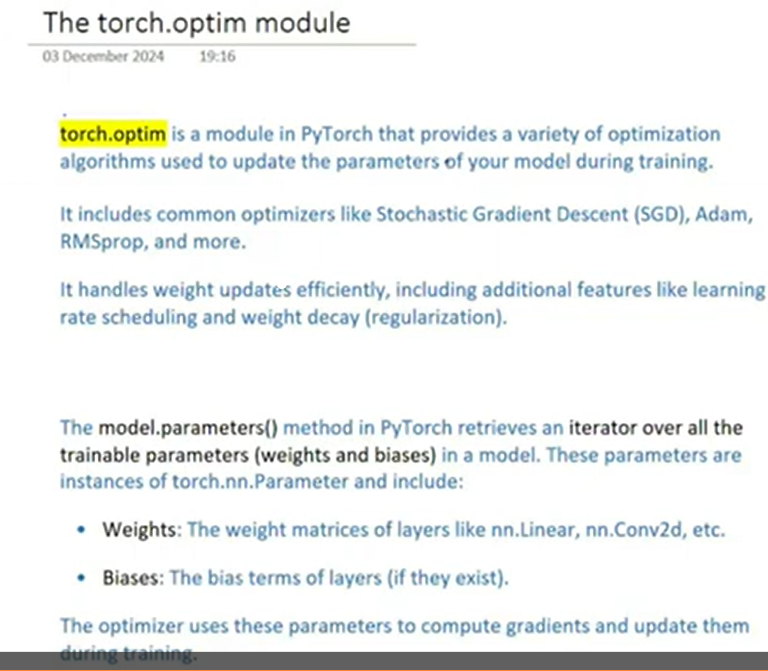